In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram
import scipy.cluster.hierarchy as shc
import seaborn as sns

In [5]:
df = pd.read_csv('Hitters.csv')

In [6]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [8]:
#Checking for missing values
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [12]:
#If we want we can either remove those NaN value using dropna or replace it by median value but not required as we only need to consider CRuns col

In [13]:
#Splitting the dataset
X = df[['CRuns']]

In [14]:
#Feature Scaling
s = StandardScaler()
X_scaled = s.fit_transform(X)

In [15]:
#Perform Hierarchical Clustering
linked = linkage(X_scaled,method='ward')

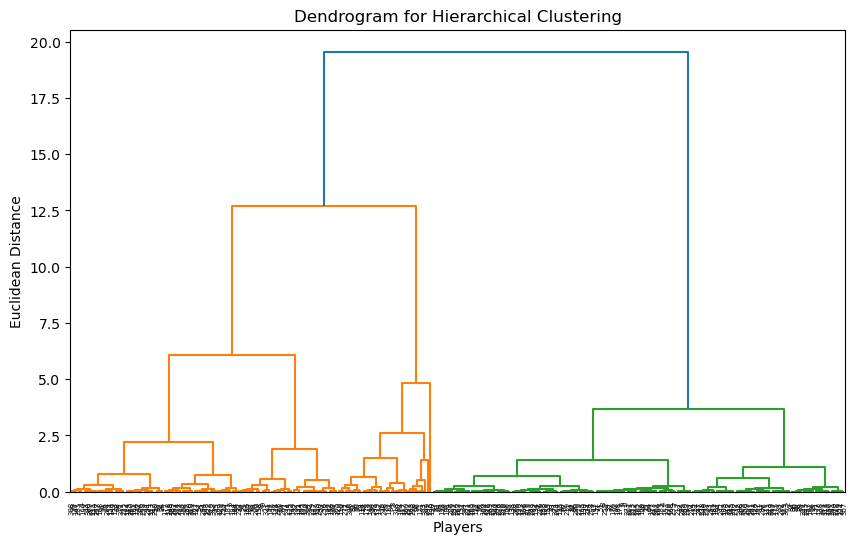

<Figure size 640x480 with 0 Axes>

In [16]:
#Dendrogram
plt.figure(figsize=(10,6))
dnd = dendrogram(linked,orientation='top',distance_sort='descending')
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Players")
plt.ylabel("Euclidean Distance")
plt.show()
plt.savefig('dendrogram_2.png')

In [17]:
optimal_k = 3
df['Clusters'] = fcluster(linked,optimal_k,criterion='maxclust')

In [18]:
print(df['Clusters'].value_counts().sort_index())

Clusters
1    172
2     39
3    111
Name: count, dtype: int64


In [19]:
import seaborn as sns

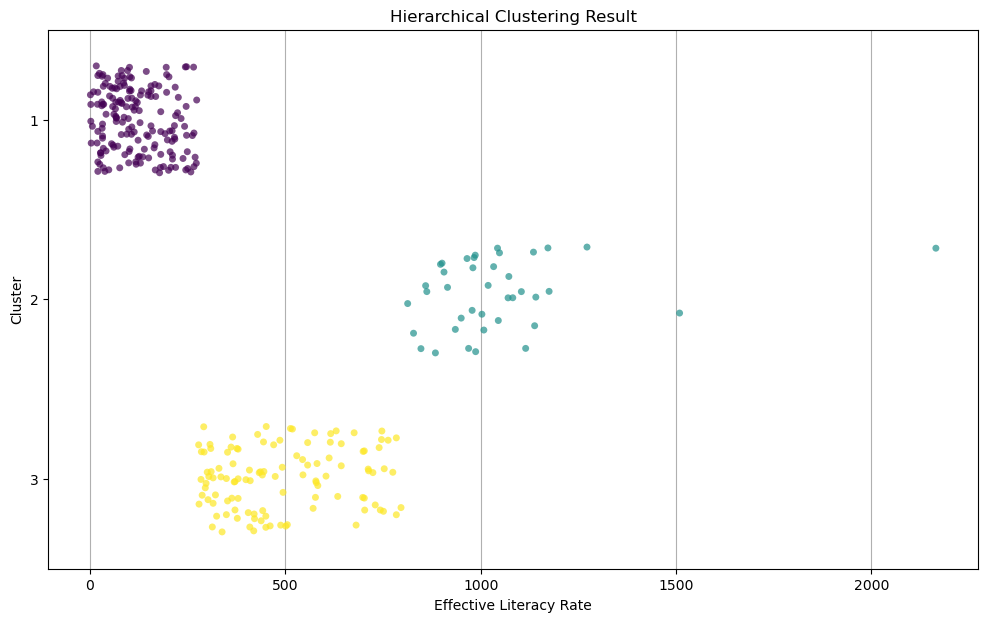

In [21]:
plt.figure(figsize=(12,7))
sns.stripplot(x='CRuns',y='Clusters',data=df,palette='viridis',hue='Clusters',jitter=0.3,alpha=0.7,orient='h')
plt.title('Hierarchical Clustering Result')
plt.xlabel('Effective Literacy Rate')
plt.ylabel('Cluster')
plt.yticks(ticks=range(optimal_k), labels=range(1,optimal_k+1))
plt.legend().remove()
plt.grid(axis='x')
plt.savefig('hierarchichal_cluster_2.png')